# **TRAINING A CNN MODEL ON CIFAR10 IMAGE DATA:-**

In [30]:
#IMPORTING TENSORFLOW:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ReduceLROnPlateau
import numpy as np
import pandas as pd

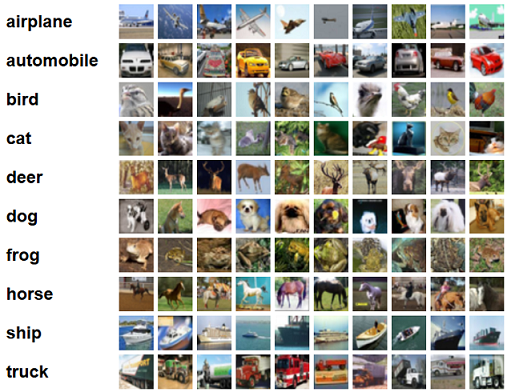

In [2]:
#DOWNLOAD AND PREPARE THE CIFAR10 DATASET:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [3]:
len(train_images) #TOTAL 50k TRAINING IMAGES ARE PRESENT

50000

In [4]:
len(test_images) #TOTAL 10K TESTING IMAGES ARE PRESENT

10000

In [5]:
#normalize the pixel values:
train_images, test_images = train_images / 255, test_images / 255

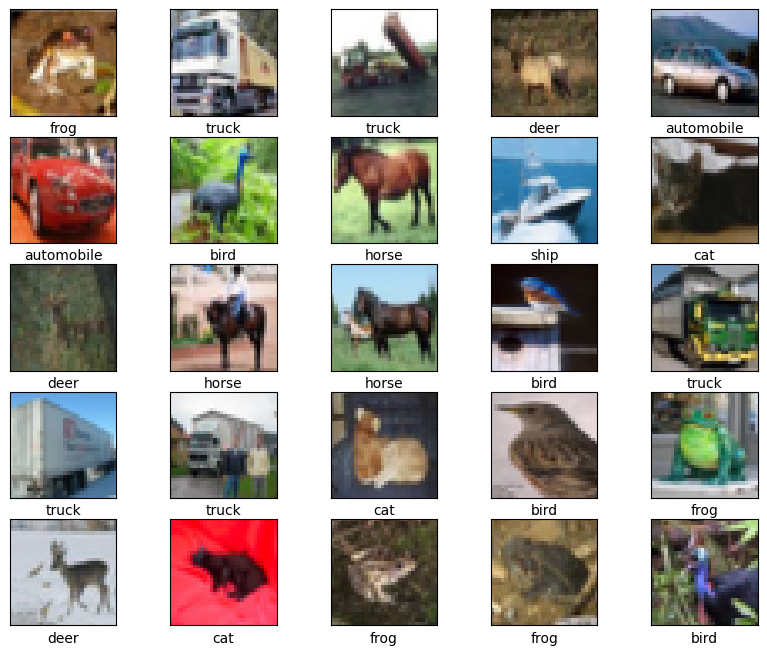

In [6]:
#plot first 25 dataset:-
class_name=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

plt.figure(figsize=(10,8))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_name[train_labels[i][0]])
plt.show()

In [7]:
#convolution part:-
# Build a slightly deeper CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     4,194,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴─────────────

 Total params: 4,490,794 (17.13 MB)

 Trainable params: 4,488,874 (17.12 MB)

 Non-trainable params: 1,920 (7.50 KB)

In [9]:
from tensorflow.keras.utils import to_categorical

#one hot encoding:-

train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)

# Then your loss function can stay as:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
#early stopping:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=5,          # Number of epochs with no improvement after which training will be stopped.
    restore_best_weights=True # Restore model weights from the epoch with the best value of the monitored quantity.
)

In [11]:
# Learning rate reduction
reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.5,  # Factor by which the learning rate will be reduced. new_lr = lr * factor
                              patience=3,  # Number of epochs with no improvement after which learning rate will be reduced.
                              min_lr=0.00001) # Lower bound on the learning rate.


In [12]:
# Train the model with callbacks
history = model.fit(train_images, train_labels, epochs=100,
                    validation_data=(test_images, test_labels),
                    callbacks=[early_stopping, reduce_lr]) # Add reduce_lr callback


Epoch 1/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 12ms/step - accuracy: 0.4172 - loss: 1.8863 - val_accuracy: 0.6532 - val_loss: 1.0098 - learning_rate: 0.0010
Epoch 2/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6628 - loss: 0.9625 - val_accuracy: 0.7234 - val_loss: 0.7918 - learning_rate: 0.0010
Epoch 3/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7323 - loss: 0.7707 - val_accuracy: 0.7649 - val_loss: 0.6716 - learning_rate: 0.0010
Epoch 4/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7721 - loss: 0.6554 - val_accuracy: 0.7735 - val_loss: 0.6547 - learning_rate: 0.0010
Epoch 5/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8056 - loss: 0.5574 - val_accuracy: 0.7842 - val_loss: 0.6398 - learning_rate: 0.0010
Epoch 6/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.8371 - loss: 0.4722 - val_accuracy: 0.7971 - val_loss: 0.6219 - learning_rate: 0.0010
Epoch 7/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accur

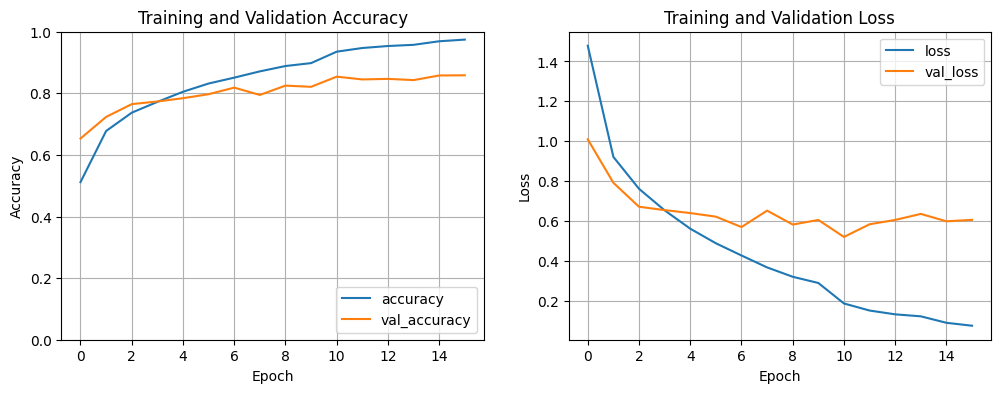

In [13]:
# Plot accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy') # accuracy.
plt.plot(history.history['val_accuracy'], label='val_accuracy') #validation accuracy.
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.grid(True)
plt.show()


In [14]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_acc}")

313/313 - 1s - 4ms/step - accuracy: 0.8541 - loss: 0.5201
Test accuracy: 0.8540999889373779


# **🧠 Step-by-Step Guide: Predict External RGB Image (CIFAR-10 CNN)**

✅ **Step 1:** Save Your Trained CIFAR-10 CNN Model
After training your CNN on CIFAR-10 dataset, save the model using model.save('cifar10_cnn_model.keras').

✅ **Step 2:** Prepare the Class Labels
CIFAR-10 has 10 predefined classes:

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

You will use these labels to map the model's numeric prediction to a class name.

✅ **Step 3:**Import Required Libraries
Import libraries like:

TensorFlow/Keras (to load model and predict)

PIL (to open and process the image)

NumPy (for array operations)

Matplotlib (for image display)

✅ **Step 4:** Load and Preprocess the External Image
Load the external tiger image using PIL.

Convert it to RGB mode (CIFAR-10 images are RGB).

Resize the image to 32x32 pixels (CIFAR-10 standard input size).

Normalize pixel values to the range [0, 1].

Reshape the image to the input shape expected by the model: (1, 32, 32, 3).

✅ **Step 5:** Load the Saved Model
Load the trained CIFAR-10 model from disk using TensorFlow.

✅ **Step 6:** Make Prediction
Feed the preprocessed image into the model.

Get the prediction output, which is a list of probabilities for each class.

Use np.argmax() to find the class with the highest probability.

Use np.max() to find the confidence score of the prediction.

✅ **Step 7:** Display Prediction and Visualize
Print the predicted class name (e.g., "cat", "dog", etc.).

Print the confidence score (how sure the model is).

Display the image using matplotlib with the predicted label as the title.

✅ **Step 8:** Try with Multiple Images
Test with various images like tiger, cat, dog, deer, etc.



In [16]:
model.save('cnn_model_cifar10.keras') #saving the model.

In [17]:
from PIL import Image, ImageOps #importing libraries.

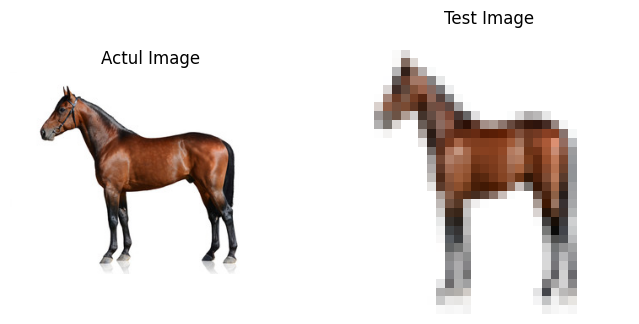

In [37]:
img=Image.open('/content/horse.jpg').convert('RGB')
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.imshow(img)
plt.title('Actul Image')
plt.axis(False)

plt.subplot(1,2,2)
img=img.resize((32,32))
plt.imshow(img)
plt.title('Test Image')
plt.axis(False)
plt.show()

In [31]:
def prediction(path,model):
  img=Image.open(path).convert('RGB')
  img=img.resize((32,32))
  image_array=np.array(img)
  image_array=image_array.astype(float) / 255.0
  image_array=image_array.reshape(1,32,32,3)

  prediction=model.predict(image_array)
  print(prediction)
  pred_label=np.argmax(prediction)
  confidence=np.max(prediction)

  return pred_label,confidence



In [38]:
def img_transport(path):
  model=tf.keras.models.load_model('cnn_model_cifar10.keras')
  pred,confidence=prediction(path,model)
  print(f"Predicted Digit : {pred}")
  print(f"Confidence : {confidence}")

  img = Image.open('/content/horse.jpg').convert("RGB")
  plt.imshow(img)
  plt.title(f"Predicted : {pred} (Confidence : {confidence})")
  plt.axis('off')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 580ms/step
[[1.4703496e-09 4.8092177e-12 2.4677252e-11 2.2630492e-10 2.5838366e-11
  4.6117580e-06 1.6207174e-12 9.9999535e-01 1.3661724e-11 3.0248365e-10]]
Predicted Digit : 7
Confidence : 0.9999953508377075


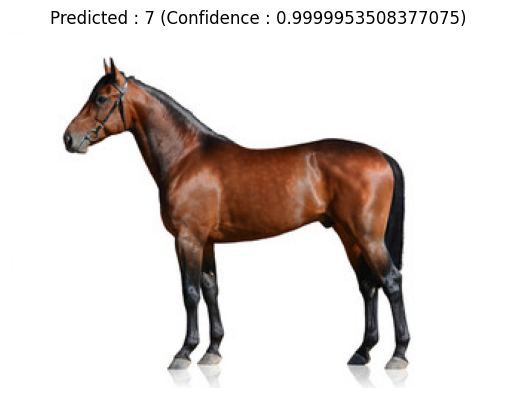

In [39]:
#now we are trainsporting the image:
img_transport('/content/horse.jpg')

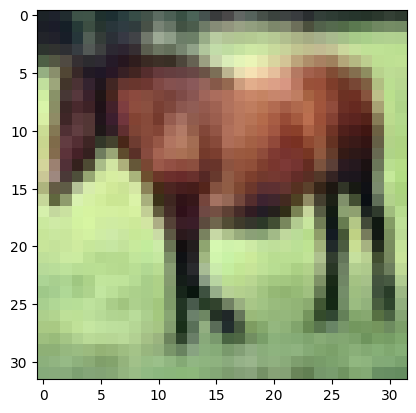

In [44]:
#checking for accuracy:-
plt.imshow(train_images[7])

# **CORRECT PREDICTION**

# 🧠 CNN Model: External Image Loading & Prediction — Step-by-Step Guide
✅ **Step 1:** Save Your Trained CNN Model
After training your model (on MNIST or similar), save it to a file so it can be used later for predictions.

✅ **Step 2:** Import Necessary Libraries
Make sure you import libraries for:

TensorFlow or Keras (for model handling)

PIL (to load and process images)

NumPy (for numerical operations)

Matplotlib (to visualize predictions)

✅ **Step 3:** Define a Function to Preprocess and Predict the Image
Create a function that:

Loads the external image

Converts it to grayscale (since MNIST uses grayscale)

Inverts the image (white digit on black background)

Resizes it to 28x28 pixels

Normalizes pixel values to 0–1

Reshapes it to match CNN input format (1, 28, 28, 1)

Predicts using the loaded model

Returns the predicted digit and confidence

✅ **Step 4:** Define a Function to Load the Model and Use the Above Prediction Function
Create a wrapper function that:

Loads the saved model from file

Calls the prediction function

Displays the predicted digit and confidence

Also shows the image with title using matplotlib

✅ **Step 5:** Upload or Use an Image
Use an external image file (JPG/PNG) of a handwritten digit (0–9)

If you're using Google Colab, use files.upload() to bring the image in

✅ **Step 6:** Call the Load-and-Predict Function
Give your image path to the function and run it

You’ll see:

The predicted digit

The confidence score

The image displayed with prediction details

✅ **Step 7:** Practice with Different Images
Test the model with multiple images
